<h4><strong>Реализация методов одномерного поиска с точностью 0,001
 <br>4 вариант: (x-15)^2+5, x ∊ [2,200]</strong> </h4>

In [19]:
import numpy as np
import time
import pandas as pd
import math
from matplotlib import pyplot as plt

In [20]:
#задаем нашу функцию
def f(x):
    return (x-15)**2+5

min_f_list = []
min_x_list = []
iterations_list = []
exec_time_list = []
final_interval_length_list=[]

метод половинного деления


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		2.000000	101.000000	99.000000		N/A
2		2.000000	51.500000	49.500000		0.5
3		26.750000	51.500000	24.750000		0.5
4		26.750000	39.125000	12.375000		0.5
5		26.750000	32.937500	6.187500		0.5
6		26.750000	29.843750	3.093750		0.5
7		26.750000	28.296875	1.546875		0.5
8		26.750000	27.523438	0.773438		0.5
9		26.750000	27.136719	0.386719		0.5
10		26.750000	26.943359	0.193359		0.5
11		26.750000	26.846680	0.096680		0.5
12		26.750000	26.798340	0.048340		0.5
13		26.750000	26.774170	0.024170		0.5
14		26.750000	26.762085	0.012085		0.5
15		26.750000	26.756042	0.006042		0.5
16		26.750000	26.753021	0.003021		0.5
17		26.750000	26.751511	0.001511		0.5
18		26.750000	26.750755	0.000755		0.5

Метод половинного деления: Минимальное значение функции - 143.0625, значение x - 26.75, число итераций - 18, время выполнения - 0.0 секунд


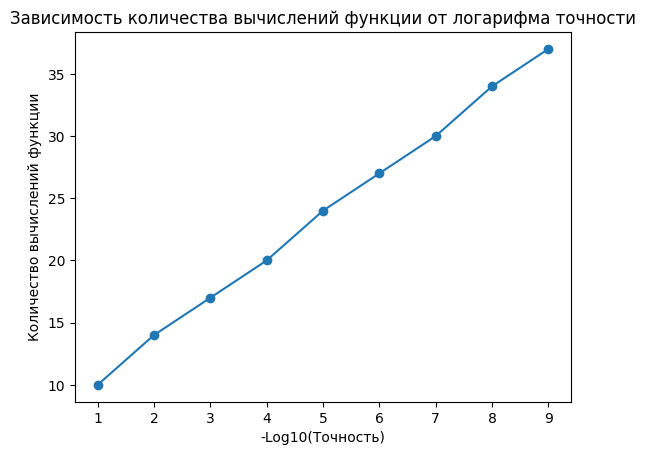

In [21]:
def find_min_half_interval(start, end, tol):
    iterations = 0
    data = []  
    prev_interval_length = float('inf')  
    while end - start > tol:
        iterations += 1
        mid = (start + end) / 2
        if f(mid) > f(start):
            end = mid
        else:
            start = mid

        interval_length = end - start
        ratio = interval_length / prev_interval_length if iterations > 1 else None
        
        data.append([iterations, start, end, interval_length, ratio])
    
        prev_interval_length = interval_length

    return start, f(start), iterations, data

tolerance = float(input("Введите точность: "))

start_time = time.time()

result = find_min_half_interval(2,200, tolerance)

end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    min_x, min_f, iterations, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"\nМетод половинного деления: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time} секунд")
    min_f_list.append(min_f)
    min_x_list.append(min_x)
    iterations_list.append(iterations)
    exec_time_list.append(exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list1 = [find_min_half_interval(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"\nМетод половинного деления: Точность - {tolerance}, число итераций - {iterations}, время выполнения - {end_time - start_time:.6f} секунд")


метод золотого сечения


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		2.000000	124.364000	122.364000		N/A
2		2.000000	77.620952	75.620952		0.3818770226537217
3		2.000000	48.733748	46.733748		0.38187702265372164
4		2.000000	30.881456	28.881456		0.3818770226537216
5		2.000000	19.848740	17.848740		0.3818770226537217
6		8.818219	19.848740	11.030521		2.6186440677966103
7		13.031878	19.848740	6.816862		2.61864406779661
8		13.031878	17.244699	4.212821		0.38187702265372175
9		13.031878	15.635401	2.603523		0.3818770226537216
10		14.026424	15.635401	1.608977		2.6186440677966094
11		14.641053	15.635401	0.994348		2.618644067796607
12		14.641053	15.255560	0.614507		0.38187702265372014
13		14.875795	15.255560	0.379765		2.6186440677965925
14		14.875795	15.110490	0.234695		0.3818770226537268
15		14.965448	15.110490	0.145042		2.6186440677965854
16		14.965448	15.055084	0.089636		0.3818770226537296
17		14.965448	15.020843	0.055395		0.38187702265373363
18		14.986609	15.020843	0.034234		2.61864406779

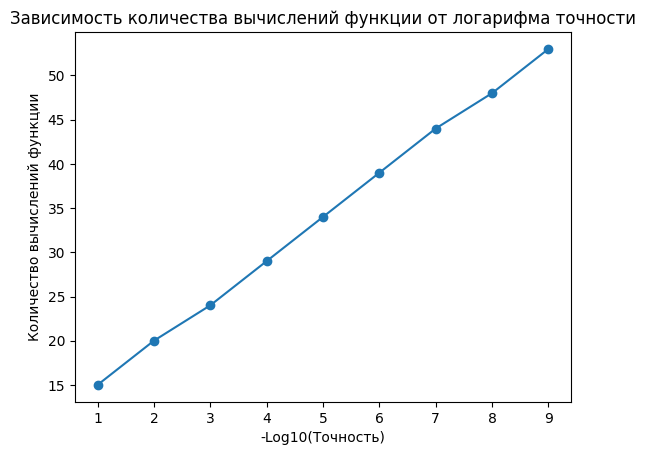

In [22]:
import time
import math
import matplotlib.pyplot as plt

def find_min_golden_section(start, end, tol):
    iterations = 0
    data = []

    while end - start > tol:
        iterations += 1
        mid1 = start + (end - start) * 0.382
        mid2 = start + (end - start) * 0.618

        if f(mid1) > f(mid2):
            start = mid1
        else:
            end = mid2

        interval_length = end - start
        ratio = (end - mid1) / (mid2 - start) if iterations > 1 else None

        data.append([iterations, start, end, interval_length, ratio])

    return start, f(start), iterations, data

def plot_iterations_vs_tolerance_golden(tolerances):
    iterations_list1 = [find_min_golden_section(0, 100, tol)[2] for tol in tolerances]
    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()

tolerance = float(input("Введите точность: "))
start_time = time.time()
result = find_min_golden_section(2, 200, tolerance)
end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    min_x, min_f, iterations, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")

    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"\nМетод золотого сечения: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")

    min_f_list.append(min_f)
    min_x_list.append(min_x)
    iterations_list.append(iterations)
    exec_time_list.append(exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    plot_iterations_vs_tolerance_golden(tolerances)
else:
    iterations = result
    print(f"\nМетод золотого сечения: Точность - {tolerance}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")



метод Фибоначчи


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		0.000000	61.803399	61.803399		N/A
2		0.000000	38.196601	38.196601		1.618033988749895
3		0.000000	23.606798	23.606798		1.618033988749895
4		9.016994	23.606798	14.589803		1.6180339887498947
5		9.016994	18.033989	9.016994		1.618033988749895
6		12.461180	18.033989	5.572809		1.6180339887498936
7		12.461180	15.905365	3.444185		1.6180339887498945
8		13.776741	15.905365	2.128624		1.6180339887498916
9		14.589803	15.905365	1.315562		1.6180339887498998
10		14.589803	15.402865	0.813062		1.6180339887498967
11		14.900365	15.402865	0.502500		1.6180339887499082
12		14.900365	15.210927	0.310562		1.618033988749899
13		14.900365	15.092303	0.191938		1.6180339887498902
14		14.973679	15.092303	0.118624		1.618033988749868
15		14.973679	15.046993	0.073314		1.6180339887499262
16		14.973679	15.018990	0.045310		1.6180339887499156
17		14.990986	15.018990	0.028003		1.6180339887500066
18		14.990986	15.008293	0.017307		1.6180339887497683
19	

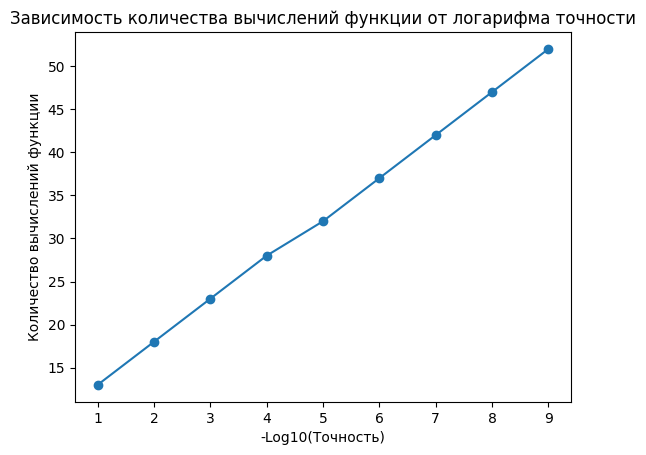

In [23]:
def fibonacci_method(a, b, tol):
    fib_sequence = [1, 1]

    while fib_sequence[-1] < (b - a) / tol:
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

    rho = 0.5 * (1.0 + math.sqrt(5.0))
    c = b - (b - a) / rho
    d = a + (b - a) / rho
    fc = f(c)
    fd = f(d)
    iterations = 0
    data = []

    while abs(c - d) > tol:
        iterations += 1

        if fc < fd:
            b = d
            d = c
            c = b - (b - a) / rho
            fd = fc
            fc = f(c)
        else:
            a = c
            c = d
            d = a + (b - a) / rho
            fc = fd
            fd = f(d)

        xmin = 0.5 * (a + b)
        ymin = f(xmin)
        interval_length = b - a
        ratio = interval_length / (b - c) if iterations > 1 else None

        data.append([iterations, a, b, interval_length, ratio])

    return ymin, xmin, iterations, data

def plot_iterations_vs_tolerance_fibonacci(tolerances):
    iterations_list1 = [fibonacci_method(2, 200, tol)[2] for tol in tolerances]
    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()

tolerance = float(input("Введите точность: "))
start_time = time.time()
result = fibonacci_method(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    min_f, min_x, iterations, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")

    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"\nМетод Фибоначчи: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")

    min_f_list.append(min_f)
    min_x_list.append(min_x)
    iterations_list.append(iterations)
    exec_time_list.append(exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    plot_iterations_vs_tolerance_fibonacci(tolerances)
else:
    iterations = result
    print(f"\nМетод Фибоначчи: Точность - {tolerance}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")

Метод Ньютона: Минимальное значение функции - 230, значение x - 0, число итераций - 20, время выполнения - 0.000000 секунд, длина конечного отрезка - 9.5367431640625e-05

Таблица результатов:
Итерация	X			F(X)			Начало интервала	Конец интервала
0		50.000000	1230.000000	0.000000		100.000000
1		32.428571	308.755102	0.000000		100.000000
2		23.570843	78.459351	0.000000		100.000000
3		18.993735	20.949919	0.000000		100.000000
4		16.370887	6.879331	0.000000		100.000000
5		13.861807	6.295484	0.000000		100.000000
6		16.627367	7.648323	0.000000		100.000000
7		14.277460	5.522065	0.000000		100.000000
8		18.098744	14.602211	0.000000		100.000000
9		15.742593	5.551445	0.000000		100.000000
10		12.004716	13.971729	0.000000		100.000000
11		14.337003	5.439565	0.000000		100.000000
12		18.439258	16.828494	0.000000		100.000000
13		15.992728	5.985509	0.000000		100.000000
14		12.978050	9.088280	0.000000		100.000000
15		15.225456	5.050830	0.000000		100.000000
16		4.024070	125.471039	0.000000		100.000000
17		9.

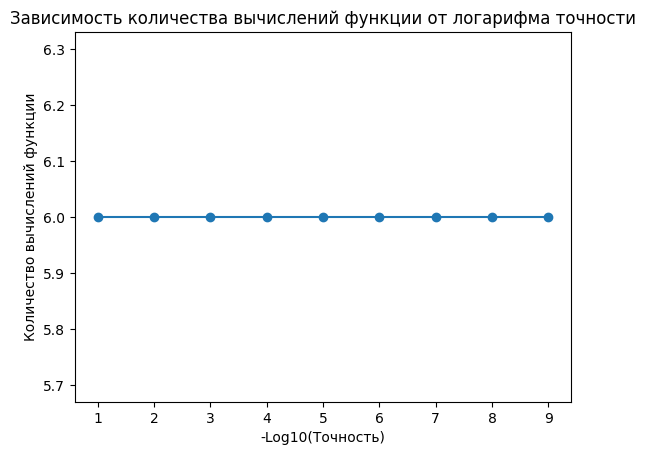

In [24]:
import math
import time

def func(x):
    return (x-15)**2+5

def derivative(x):
    return 2*(x-15)

def newton_method(initial_guess, tolerance, interval):
    x = initial_guess
    iteration = 0
    data = []

    start_time = time.time()

    while abs(derivative(x)) > tolerance and interval[0] <= x <= interval[1]:
        f_x = func(x)
        data.append([iteration, x, f_x, interval[0], interval[1]])

        x = x - f_x / derivative(x)
        iteration += 1

    end_time = time.time()
    exec_time = end_time - start_time

    if x < interval[0]:
        x = interval[0]
    elif x > interval[1]:
        x = interval[1]

    final_interval_length = interval[1] - interval[0]

    return x, func(x), final_interval_length, iteration, exec_time, data

# Rest of the code remains unchanged
initial_guess = 50
interval = (0, 100)
tolerance = 0.001

min_x, min_f, _, iterations, exec_time, data = newton_method(initial_guess, tolerance, interval)

interval_length = (interval[1] - interval[0]) / 2**iterations
print(f"Метод Ньютона: Минимальное значение функции - {min_f}, значение x - {min_x}, "
      f"число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд, "
      f"длина конечного отрезка - {interval_length}")

# Print interval boundaries at each iteration
print("\nТаблица результатов:")
print("Итерация\tX\t\t\tF(X)\t\t\tНачало интервала\tКонец интервала")


def plot_iterations_newton(tolerances): 
    iterations_list1 = [newton_method(0, 200, tol)[2] for tol in tolerances]
    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()

for row in data:
    print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4]:.6f}")

plot_iterations_vs_tolerance_newton(tolerances)
